In [ ]:
import importlib
import subprocess
import sys

def instalar_si_no(paquete, nombre_import=None):
    if nombre_import is None:
        nombre_import = paquete
    try:
        importlib.import_module(nombre_import)
        print(f"{paquete} ya está instalado.")
    except ImportError:
        print(f"{paquete} no encontrado. Instalando...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

# Lista de paquetes a comprobar
instalar_si_no("numpy")
instalar_si_no("pandas")
instalar_si_no("matplotlib")
instalar_si_no("seaborn")
instalar_si_no("scikit-learn", "sklearn")


numpy ya está instalado.
pandas ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.
scikit-learn ya está instalado.


# **EJERCICIO DE APLICACIÓN: ENFERMEDAD DE PARKINSON**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Carga el CSV
df = pd.read_csv("parkinsons_data.csv")

**Tratamiento del DataSet**

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
190,191,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,192,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,193,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,194,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0
194,195,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Verificación de dataset balanceado**

status
1    147
0     48
Name: count, dtype: int64


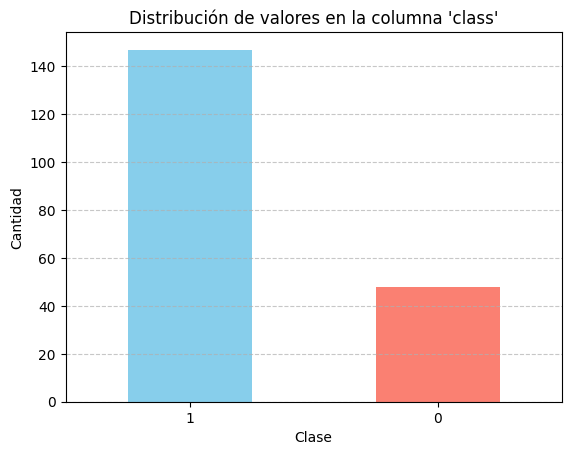

In [ ]:
conteo_class = df["status"].value_counts()
print(conteo_class)

conteo_class.plot(kind='bar', color=['skyblue', 'salmon', 'yellow'])
plt.title("Distribución de valores en la columna 'class'")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
C_1 = 147  # Clase 1
C_2 = 48  # Clase 2

C_1 = (C_1*100)/(147+48)
C_2 = (C_2*100)/(147+48)

print(C_1)
print(C_2)

75.38461538461539
24.615384615384617


**Datos inconsistentes**

In [ ]:
df = df.astype(str)

# Fila que contiene al menos un "?" en alguna celda
df_con_interrogacion = df[df.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

# Fila que NO contiene ningún "?" en ninguna celda
df_sin_interrogacion = df[~df.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

print(f"Filas con '?': {len(df_con_interrogacion)}")
print(f"Filas sin '?': {len(df_sin_interrogacion)}")


Filas con '?': 0
Filas sin '?': 195


In [ ]:
df = df.astype(float)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,1.0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1.0
1,2.0,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1.0
2,3.0,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1.0
3,4.0,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1.0
4,5.0,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.0


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
190,191.0,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0.0
191,192.0,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0.0
192,193.0,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0.0
193,194.0,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0.0
194,195.0,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,0.0


In [ ]:
# Verificar si hay al menos un NaN en el DataFrame
hay_nan = df.isnull().values.any()

print("¿Hay valores NaN?:", hay_nan)

if not hay_nan:
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print("Se ha reordenado aleatoriamente el DataFrame.")
else:
    print("El DataFrame contiene valores NaN. No se reordenó.")

¿Hay valores NaN?: False
Se ha reordenado aleatoriamente el DataFrame.


# Usando los for

In [ ]:
## Funcion para MLP
def entrenar_evaluar_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, early_stopping=True, max_iter=50, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    especificidad = np.nan
    if cm.shape[0] == 2:
        tn, fp, fn, tp = cm.ravel()
        especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "especificidad": especificidad
    }


In [ ]:
## Funcion para KNN
def entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred_knn)

    # Calcular la precisión global
    accuracy_knn = np.trace(cm_knn) / cm_knn.sum() if cm_knn.sum() > 0 else 0

    precisions = []
    recalls = []
    specificities = []

    num_classes = cm_knn.shape[0]

    if num_classes == 0:
        return {
            "accuracy": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "especificidad": 0.0
        }

    for i in range(num_classes):
        tp = cm_knn[i, i]
        fp = cm_knn[:, i].sum() - tp
        fn = cm_knn[i, :].sum() - tp
        tn = cm_knn.sum() - (tp + fp + fn)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # Verdaderos negativos / (Verdaderos negativos + Falsos positivos)

        precisions.append(precision)
        recalls.append(recall)
        specificities.append(specificity)

    # Calcular promedios ponderados si hay múltiples clases para las métricas
    if num_classes > 1:
        total_samples_per_class = cm_knn.sum(axis=1)
        total_samples = total_samples_per_class.sum()
        weights = total_samples_per_class / total_samples if total_samples > 0 else np.zeros(num_classes)

        weighted_precision = np.sum(np.array(precisions) * weights)
        weighted_recall = np.sum(np.array(recalls) * weights)
        weighted_specificity = np.sum(np.array(specificities) * weights)
    else: # Caso binario
        weighted_precision = precisions[0]
        weighted_recall = recalls[0]
        weighted_specificity = specificities[0]

    return {
        "accuracy": accuracy_knn,
        "precision": weighted_precision,
        "recall": weighted_recall,
        "especificidad": weighted_specificity
    }

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

features = [col for col in df.columns if col != 'status']
target = 'status'
num_repetitions = 30
resultados_totales = []

for rep in range(num_repetitions):
    df_shuffle = shuffle(df, random_state=rep)
    df_shuffle_reset_index = df_shuffle.reset_index(drop=True)


    resultados_repeticion = {
        "MLP_Deep": [],
        "MLP_Simple": [],
        "KNN_k3": [],
        "KNN_k5": [],
        "KNN_k27": []
    }

    print(f"Calculando repetición {rep + 1}/{num_repetitions}...")


    ## K Fold
    k = 10
    df_sh = df_shuffle.sample(frac=1, random_state=42).reset_index(drop=True)
    fold_size = len(df) // k
    fk_accuracies = []

    for i in range(k):
      start = i * fold_size
      end = start + fold_size if i < k-1 else len(df)

      test = df_sh.iloc[start:end]
      train = pd.concat([df_sh.iloc[:start], df_sh.iloc[end:]])

      X_train = train[features].values
      y_train = train[target].values
      X_test = test[features].values
      y_test = test[target].values

      # DEEP LEARNING
      res_mlp_deep = entrenar_evaluar_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10, 3))
      resultados_repeticion["MLP_Deep"].append(res_mlp_deep)

      # MLP
      res_mlp_simple = entrenar_evaluar_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10,))
      resultados_repeticion["MLP_Simple"].append(res_mlp_simple)

      # KNN k=3
      res_knn_k3 = entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k=3)
      resultados_repeticion["KNN_k3"].append(res_knn_k3)

      # KNN k=5
      res_knn_k5 = entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k=5)
      resultados_repeticion["KNN_k5"].append(res_knn_k5)

      res_knn_k27 = entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k=27)
      resultados_repeticion["KNN_k27"].append(res_knn_k27)

    for model_name, results_list in resultados_repeticion.items():
        if results_list:
            accuracy = np.mean([r['accuracy'] for r in results_list])
            recall = np.mean([r['recall'] for r in results_list])
            precision = np.mean([r['precision'] for r in results_list])
            especificidad = np.nanmean([r['especificidad'] for r in results_list])

            resultados_totales.append({
                "repeticion_id": rep + 1,
                "modelo": model_name,
                "accuracy": accuracy,
                "recall": recall,
                "precision": precision,
                "especificidad": especificidad
            })

Calculando repetición 1/30...
Calculando repetición 2/30...
Calculando repetición 3/30...
Calculando repetición 4/30...
Calculando repetición 5/30...
Calculando repetición 6/30...
Calculando repetición 7/30...
Calculando repetición 8/30...
Calculando repetición 9/30...
Calculando repetición 10/30...
Calculando repetición 11/30...
Calculando repetición 12/30...
Calculando repetición 13/30...
Calculando repetición 14/30...
Calculando repetición 15/30...
Calculando repetición 16/30...
Calculando repetición 17/30...
Calculando repetición 18/30...
Calculando repetición 19/30...
Calculando repetición 20/30...
Calculando repetición 21/30...
Calculando repetición 22/30...
Calculando repetición 23/30...
Calculando repetición 24/30...
Calculando repetición 25/30...
Calculando repetición 26/30...


In [ ]:
df_resultados = pd.DataFrame(resultados_totales)

print("\nResultados Promedio de Leave-One-Out por Cada Repetición ")
print(df_resultados)

In [ ]:
df_resultados.head(10)

In [ ]:
df_resultados.to_csv('resultados_modelos.csv', index=False)